# **CAPSTONE 3 : Saudi Arabia Used Cars**


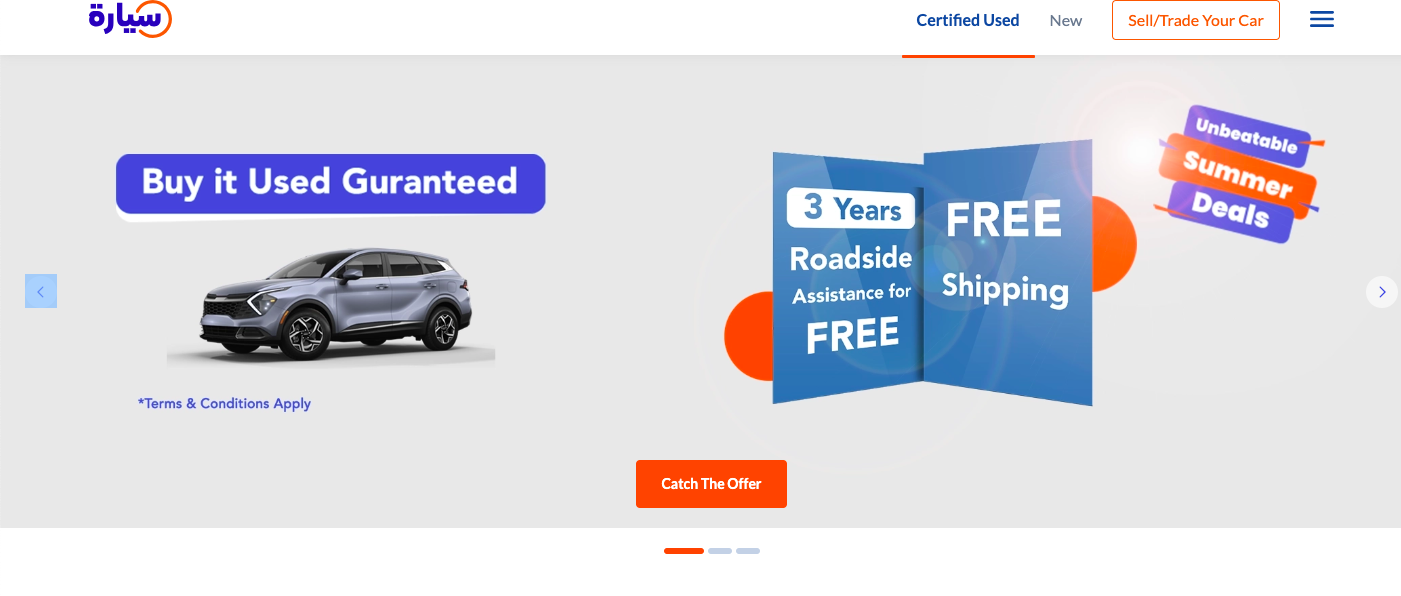
Source : https://syarah.com/

## **Business Problem Understanding**

### **Background**

The rise of the internet has revolutionized the way used cars are bought and sold, making the process more accessible than ever. Platforms like syarah.com have simplified the trading of used vehicles by allowing sellers to easily create an account and list their cars, and enabling buyers to view car prices without needing to register. This convenience, however, also presents a challenge for online dealers like syarah.com. Their success and profitability depend on their ability to draw both buyers and sellers to their platform. Revenue primarily comes from site visits and from sellers who pay to have their listings promoted. Therefore, it is essential for syarah.com to maintain a broad and active user base to meet market demands and ensure frequent site visits.

### **Business Problem**

To enhance user engagement on their platform, syarah.com could introduce a pricing recommendation feature for sellers listing their vehicles. This tool would offer sellers an estimated price for their cars, and provide buyers with a general idea of the costs associated with their potential purchases. However, implementing this feature involves challenges, including the selection of relevant data for generating accurate pricing suggestions. It is crucial to identify the most influential factors that affect car pricing and to develop a method to deliver precise price estimations to users.

### **Goals**

To develop the recommendation system, it's important to factor in various attributes such as the brand and model, production year, mileage, country of origin, included features, and transmission type, as these elements significantly influence a car's market value. It's also crucial to recognize that the same vehicle may be priced differently across various regions, indicating that the significance of these features can vary by location and impact the system's precision.

**The aim of this machine learning model is to deliver highly accurate price recommendations by analyzing these attributes.** By implementing such a system, syarah.com could attract more users to conduct transactions on their platform, thereby generating additional data that can further refine the model's accuracy. This improvement in model performance could lead to increased user activity and potentially higher revenues from sellers investing in ads to highlight their listings.

### **Analytic Approach**

To effectively implement this recommendation system, the initial step is to thoroughly examine the existing data through Exploratory Data Analysis (EDA). This process will help determine the cleanliness and readiness of the data for modeling. The next step involves identifying the key features that most significantly influence car prices. After pinpointing these critical attributes, the focus shifts to developing a model capable of interpreting these features and evaluating its performance against test data.

**Given the scenario and the current understanding, the most practical approach is to construct multiple models and evaluate their predictions using Regression Analysis. This method will allow for a comparative analysis of different models to determine which offers the most accurate price predictions.**


### **Metric Evaluation**

Once the models have delivered their outcomes, the one demonstrating the best performance in terms of **RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error)** will be selected as the benchmark model. Following this, the next step involves testing to identify the optimal estimator for the benchmark model. After determining the best estimator, a further test is conducted to compare the new results against the benchmark. This comparison using the best estimator will help ascertain whether the model's accuracy has improved following the tuning process.

<br>

---

## **Standard Library**

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import math

# Library for modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder as ce_OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif
from sklearn.model_selection import train_test_split

# Show all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

## **Exploratory Data Analysis**

### _**Dataset**_

In [2]:
# Opening the dataset
df = pd.read_csv('data_saudi_used_cars.csv')

In [3]:
# Descriptions for each feature
descriptions = [
    "Type of used car",
    "The region in which the used car was offered for sale",
    "The company name",
    "Gear type size of used car",
    "Origin of used car",
    "Options of used car",
    "Manufacturing year",
    "The engine size of used car",
    "Mileage of used car",
    "True if the price is 0, that means it is negotiable",
    "Used car price"
]

# Generating the listItem with descriptions
listItem = []
for i, col in enumerate(df.columns):
    listItem.append([col, descriptions[i], df[col].dtype, df[col].isna().sum(),
                     df[col].nunique(), list(df[col].drop_duplicates().values)])

# Creating the DataFrame with the description column
df_desc = pd.DataFrame(data=listItem, columns=['Features', 'Description', 'Type', 'Null', 'Nunique', 'Unique Name'])
df_desc

,Features,Description,Type,Null,Nunique,Unique Name
0,Type,Type of used car,object,0,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser..."
1,Region,The region in which the used car was offered for sale,object,0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-A..."
2,Make,The company name,object,0,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mits..."
3,Gear_Type,Gear type size of used car,object,0,2,"[Manual, Automatic]"
4,Origin,Origin of used car,object,0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,Options of used car,object,0,3,"[Standard, Full, Semi Full]"
6,Year,Manufacturing year,int64,0,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017,..."
7,Engine_Size,The engine size of used car,float64,0,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, ..."
8,Mileage,Mileage of used car,int64,0,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 1700..."
9,Negotiable,"True if the price is 0, that means it is negotiable",bool,0,2,"[True, False]"


In [4]:
#sample of data
df.sample(5)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
4029,Sierra,Riyadh,GMC,Automatic,Saudi,Semi Full,2018,5.3,181313,False,131500
1776,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2010,5.3,379538,False,65000
3315,Land Cruiser,Dammam,Toyota,Automatic,Gulf Arabic,Full,2019,4.6,6000,False,267000
628,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2013,2.4,170000,False,55000


In [5]:
#Total rows and columns
df.shape

(5624, 11)

### Observation

- The dataset has 5624 rows & 11 columns.
- 4 columns with numerical values and 7 columns with categorical values.
- The categorical columns have 6 object and 1 boolean data type.
- The numerical columns have 3 integer and 1 floating data type.

## _**Features**_

#### Categorical Values

In [6]:
# Categorical Values
display(df.describe(include= ['object', 'bool']))

,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5624,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,269,2272,1431,4875,4188,2233,3828


#### Numerical Values

In [7]:
# Numerical Values
display(df.describe(include= ['int64','float64']))

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


#### Ordinal Values

In [8]:
# Oridnal values
df.groupby(['Options','Gear_Type'])[['Price']].mean()

Price
Options   Gear_Type              
Full      Automatic  76072.931864
          Manual     33785.890295
Semi Full Automatic  46547.007321
          Manual     25401.477833
Standard  Automatic  40961.707204
          Manual     25646.925566

#### Observation

There are Ordinal Category from Options and Gear Type based on the average price:
- Options: Full > Semi Full > Standard
- Gear_Type: Automatic > Manual

In [63]:
#Column Classification
categorical_columns   = ['Type','Region','Make','Gear_Type','Origin','Options']
categorical_type_make = ['Type','Make']
categorical_trans_opt = ['Gear_Type','Options']
categorical_Ori_Region= ['Region','Origin']
binary_columns        = ['Negotiable']
numerical_columns     = ['Year','Engine_Size','Mileage','Price']

### Chart

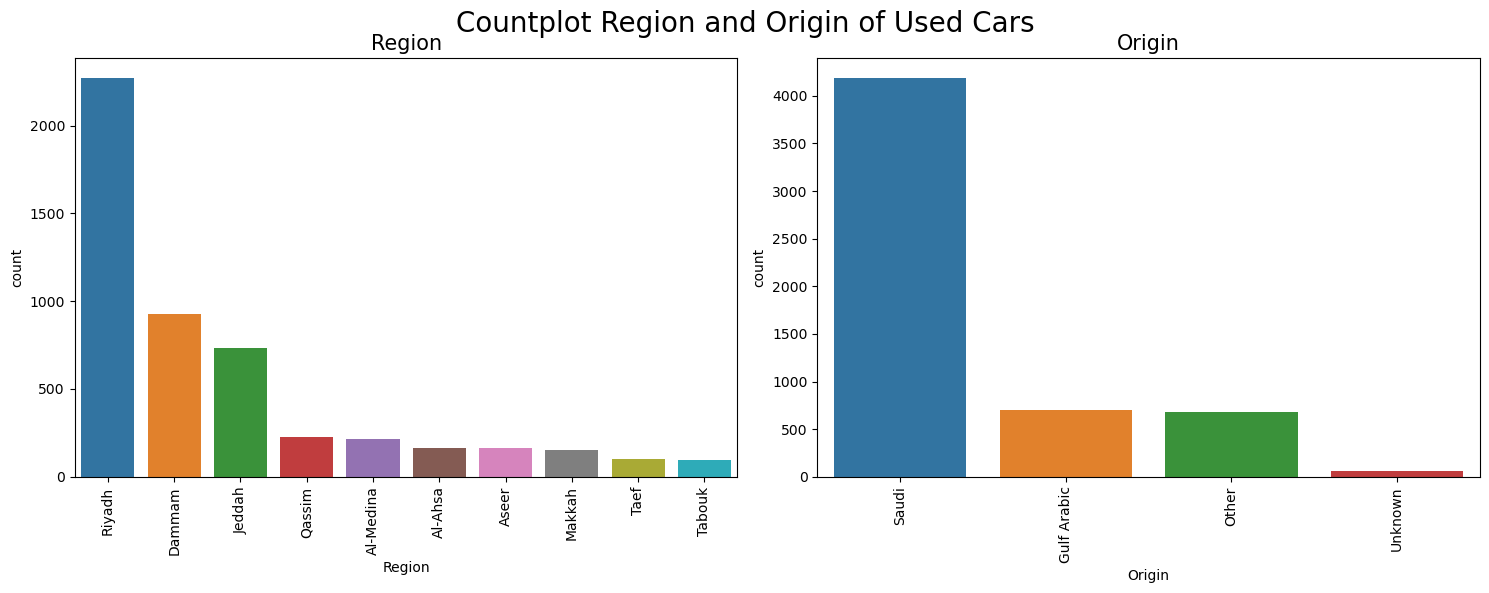

In [10]:
# Getting top Region and Origin
plt.figure(figsize= (15,6))

for i, variable in enumerate(categorical_Ori_Region):
      plt.subplot(1,2,i+1)
      
      top_categories = df[variable].value_counts().head(10).index 
      ax = sns.countplot(data= df, x= df[variable], order= top_categories, palette= 'tab10')
      plt.xticks(rotation=90)
      plt.tight_layout()
      plt.title(variable,fontsize= 15)
      
plt.suptitle('Countplot Region and Origin of Used Cars', fontsize= 20)
plt.subplots_adjust(top=0.90, hspace=0.6)
plt.show()

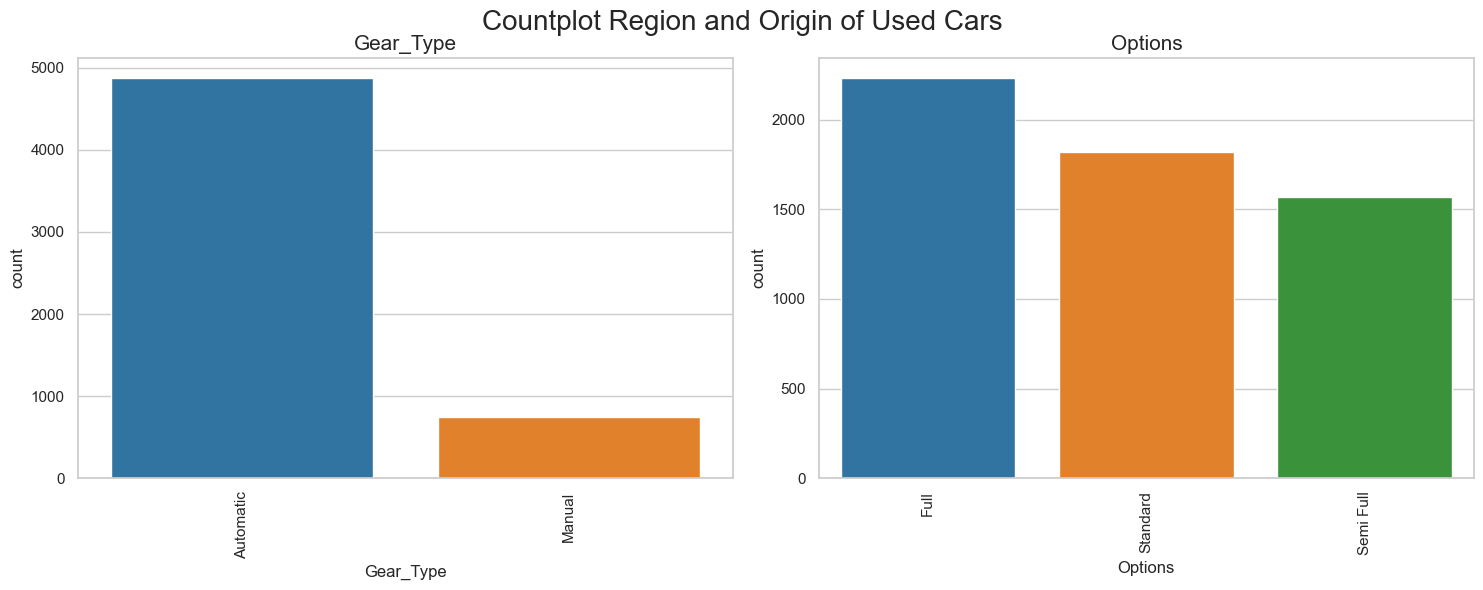

In [64]:
# Getting top Region and Origin
plt.figure(figsize= (15,6))

for i, variable in enumerate(categorical_trans_opt):
      plt.subplot(1,2,i+1)
      
      top_categories = df[variable].value_counts().head(10).index 
      ax = sns.countplot(data= df, x= df[variable], order= top_categories, palette= 'tab10')
      plt.xticks(rotation=90)
      plt.tight_layout()
      plt.title(variable,fontsize= 15)
      
plt.suptitle('Countplot Gear Type and Options', fontsize= 20)
plt.subplots_adjust(top=0.90, hspace=0.6)
plt.show()

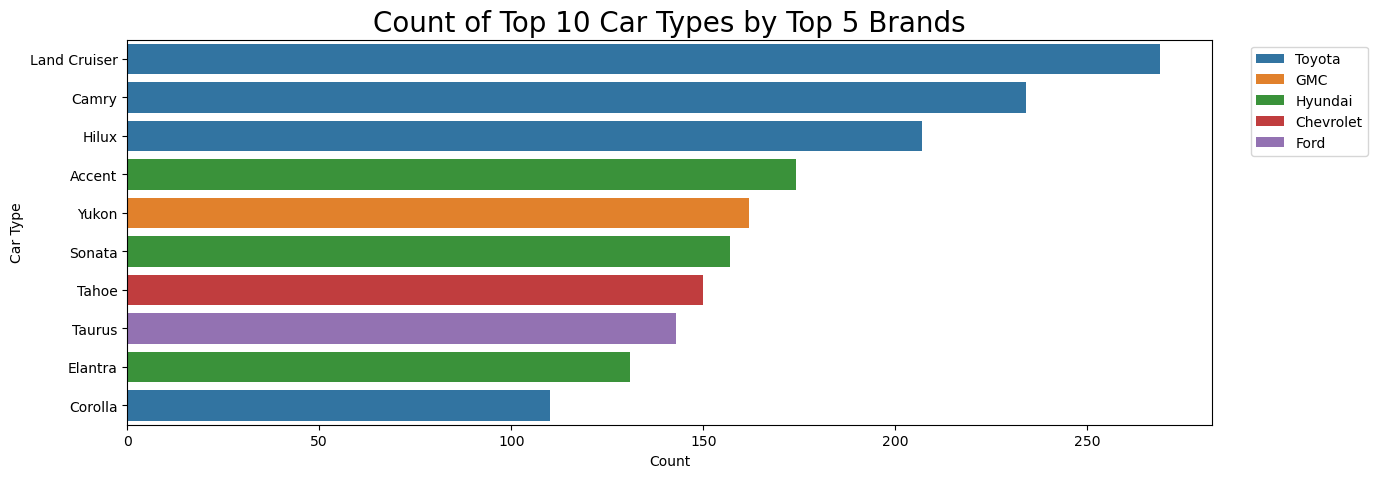

In [11]:
# top Makes and Types
top_5_makes = df['Make'].value_counts().nlargest(10).index
top_10_types = df['Type'].value_counts().nlargest(10).index

# Filtering dataframe to include only top 5 Makes and Types
filtered_df = df[df['Make'].isin(top_5_makes) & df['Type'].isin(top_10_types)]

# Plotting the countplot
plt.figure(figsize=(14, 5))
sns.countplot(data=filtered_df, y='Type', hue='Make', order=top_10_types)
plt.title('Count of Top 10 Car Types by Top 5 Brands', fontsize= 20)
plt.xlabel('Count')
plt.ylabel('Car Type')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


#### Observation

- There are 347 unique car types from 58 different manufacturers distributed across 27 regions in Saudi Arabia.
- Most cars originate from Saudi Arabia, with nearly half situated in the Riyadh region. Toyota is the most common car brand, and the Land Cruiser is the most popular model. 
- Approximately 90% of the vehicles have automatic transmissions, and nearly half come with full options (equipped with numerous features). 

### _**Duplicates, Outliers, Distribution Check**_

In [12]:
# Checking Duplicates
display(df[df.duplicated()])

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [13]:
# Checking 0 price
display(df[df['Negotiable'] == True])

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


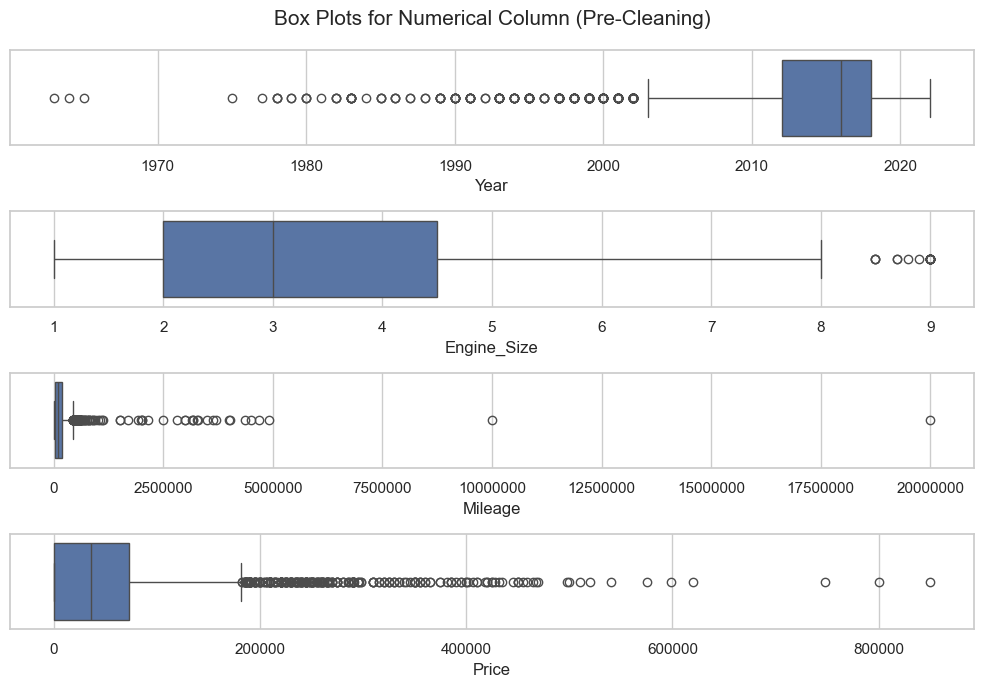

In [14]:
# Checking Outliers with box plot
numerical_feature = df.describe().columns

plt.figure(figsize= (10,7), facecolor= 'white')
sns.set(style= 'whitegrid')
plt.suptitle('Box Plots for Numerical Column (Pre-Cleaning)',fontsize= 15)
plotnumber = 1

for feature in numerical_feature:
    ax = plt.subplot(4,1,plotnumber)
    sns.boxplot(data=df, x=feature);

    plt.tight_layout()
    plt.ticklabel_format(axis= 'x', style= 'plain')
    plotnumber += 1

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

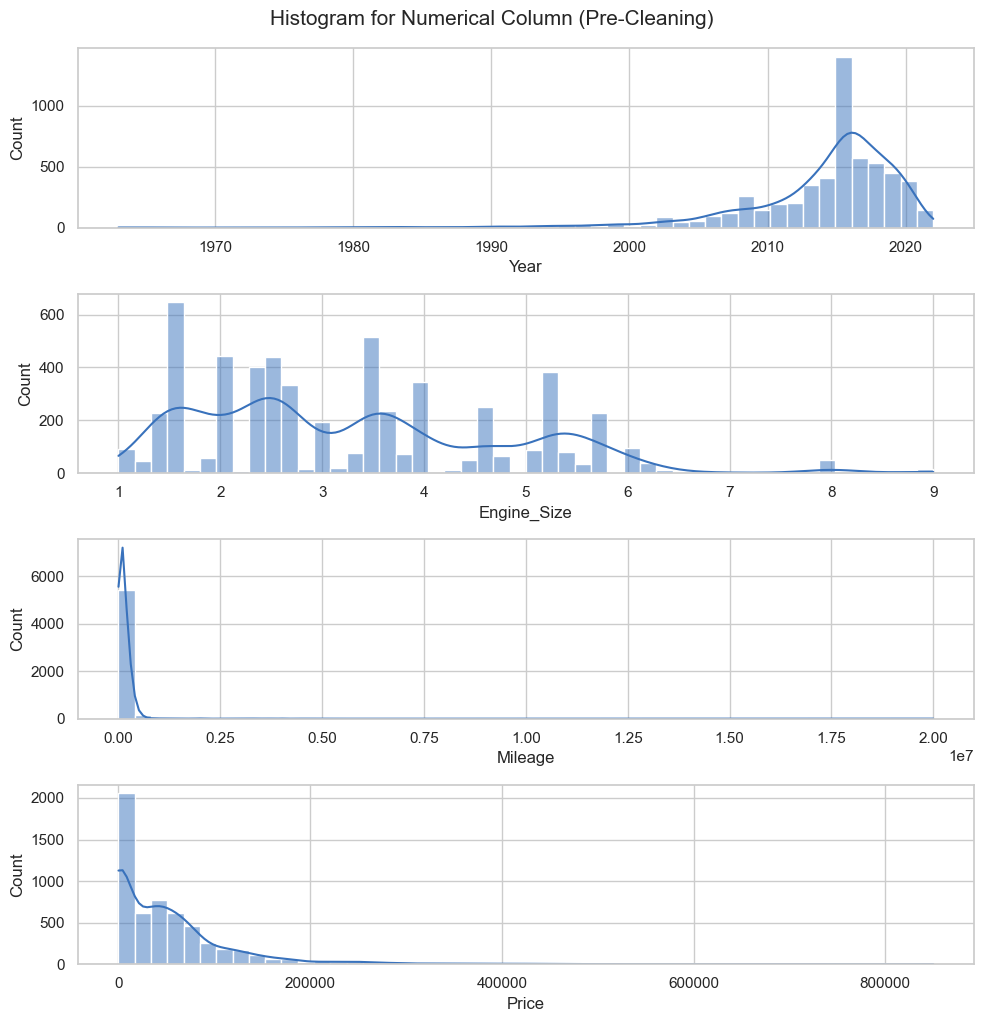

In [15]:
#Univariate Analysis with Histogram
plt.figure(figsize=(10, 10))
n = 4
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.histplot(df[numerical_columns[i]], color='#3972bc', bins=50,kde=True)
    plt.tight_layout()

plt.suptitle('Histogram for Numerical Column (Pre-Cleaning)', fontsize=15, y=1.02)
plt.show

#### Observation

- There are 4 duplicate entries in the data.
- Cars with negotiable prices are listed with a price of 0.
- The boxplot reveals outliers in the Year, Mileage, Engine_Size, and Price columns.
- Based on the Year, most cars were manufactured between 2000 and 2020, with a peak around 2015, resulting in a left-skewed distribution.
- The Engine_Size ranges from 1000cc to 9000cc, with the majority falling between 2000cc and 4500cc, leading to a right-skewed distribution.
- The Mileage varies from 100 to 20,000,000 miles, although the upper limit is likely unrealistic, indicating outliers and causing a right-skewed distribution.
- Regarding Price, 1797 cars have a price of 0, correlating with negotiable prices. The most expensive car exceeds 800,000 Riyal, and the distribution is right-skewed when plotted.

### _**Correlation**_

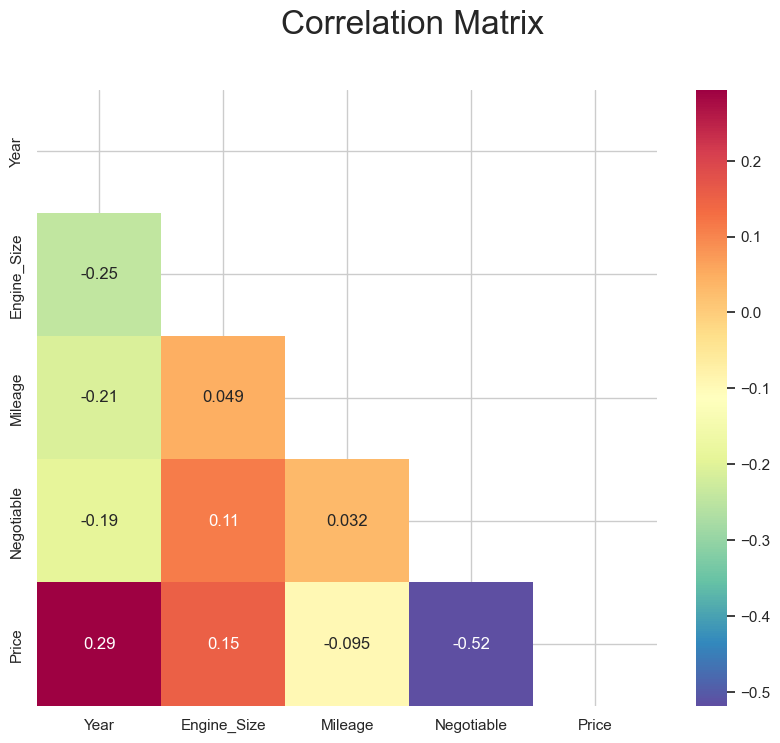

In [16]:
# Checking correlation with heatmap
plt.figure(figsize= (10,8))
sns.heatmap(df.corr(numeric_only= True), mask = np.triu(np.ones_like(df.corr(numeric_only= True))), cmap='Spectral_r',annot= True)
plt.suptitle('Correlation Matrix',fontsize= 24)
plt.show()

#### Observation
The heatmap indicates that there are no strong correlations between any of the numerical features and the target variable, price. The highest correlation is between Year and Price at 0.29. Conversely, the Negotiable column can be disregarded as it directly correlates with a price of 0.

## **Data Preprocessing**

### _**Create Copy**_

In [73]:
# Create a copy from the original dataset
df_model = df.copy()

In [71]:
# Drop duplicates
df_model.drop_duplicates()

# Dropping the row
df_model.drop(df_model[df_model['Negotiable'] == True].index, inplace= True)

# Drop Outliers Years
df_model.drop(df_model[df_model['Year']    <= 1990].index,inplace=True)

# Drop Outliers Mileage
df_model.drop(df_model[df_model['Mileage'] >= 1500000].index,inplace=True)

# Drop Outliers Price
df_model.drop(df_model[(df_model['Price']  > 450000) | (df_model['Price'] < 3500)].index, inplace=True)

# Drop Outliers Engine Size
df_model.drop(df_model[df_model['Engine_Size'] >  7].index,inplace=True)

### Reasoning for Removing Outliers

- The 1795 negotiable cars, which have a price of 0, are unnecessary for the algorithm. Although the price could be imputed using simple or iterative methods, it is better to remove these entries to ensure the algorithm processes actual data rather than imputed values based on the mean, median, or mode.

- Any calculated mileage that exceeds a reasonable threshold can be considered an outlier. After calculating, it is better to drop cars with mileage above this threshold from the dataset.

- Cars priced under 3,500 Riyal (~1,000 USD) should ideally have a higher selling price. There are only 64 cars under this price, and it is better to remove them to reduce the error value in the algorithm. The upper bound is open to interpretation, but in this case, the prices for the most expensive cars are justified and can be included in the model.

## **Clean Data**

In [72]:
df_model

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


### Visualized Categorical Values

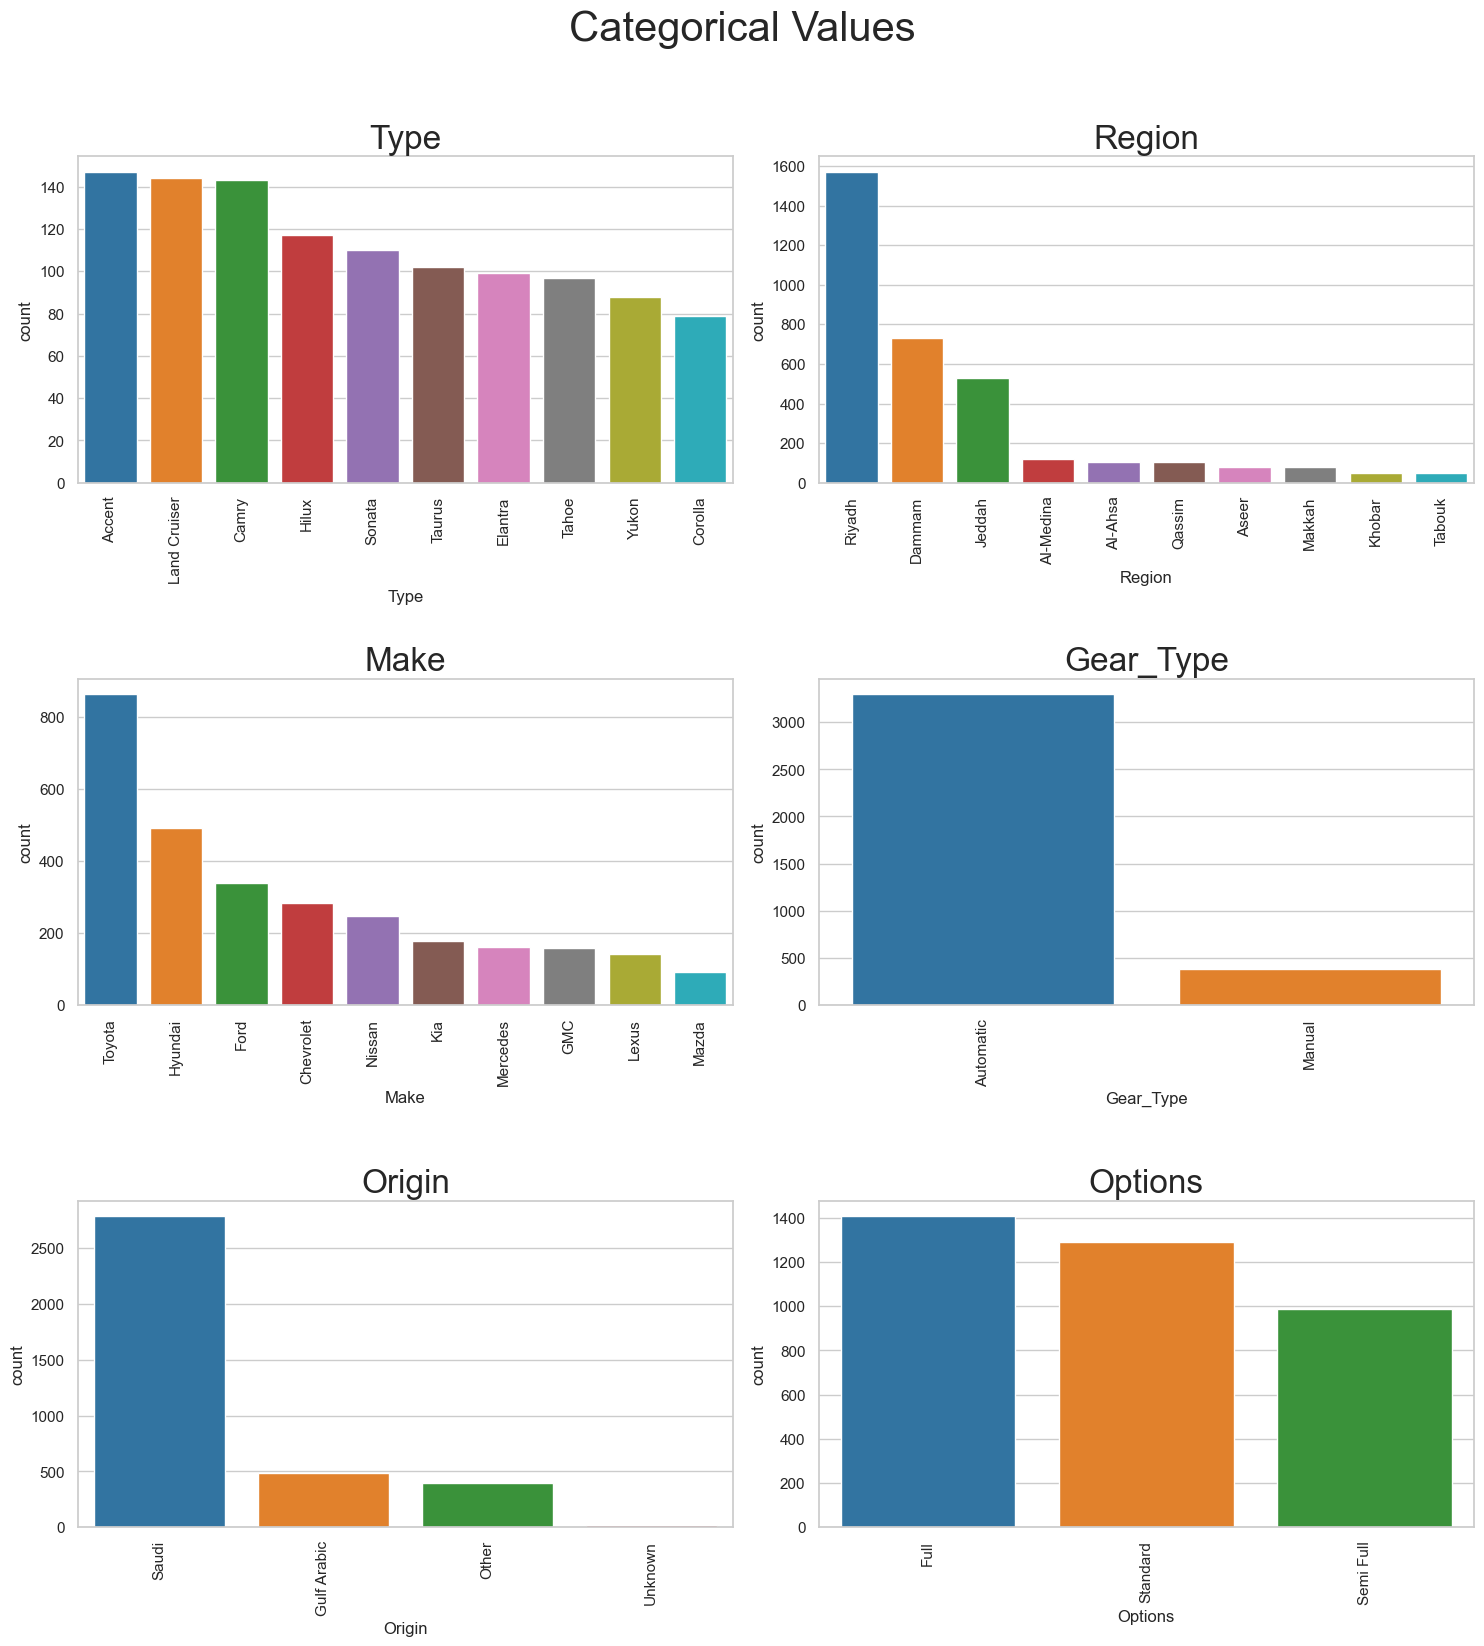

In [65]:
# Defining the categorical columns
columns = ['Type','Region','Make', 'Gear_Type', 'Origin', 'Options']

plt.figure(figsize= (15,21))

for i, variable in enumerate(columns):
      plt.subplot(4,2,i+1)
      
      top_categories = df_model[variable].value_counts().head(10).index 
      ax = sns.countplot(data= df_model, x= df_model[variable],
                         order= top_categories, palette= 'tab10')
            
      plt.xticks(rotation=90)
      plt.tight_layout()
      plt.title(variable,
                fontsize= 24)
      
plt.suptitle('Categorical Values',
             fontsize= 30)

plt.subplots_adjust(top=0.91,
                    hspace=0.6)
      
plt.show()

#### Observation

- The final dataset has now 11 columns and 3684 rows
- From the 5624 available data, it has became a functional 3684 rows that can be utilized for modelling the price recommendation system. After processing the data, there are several changes in the Type cars, other than that the trend data stays the same.

### **Visualized Outliers**

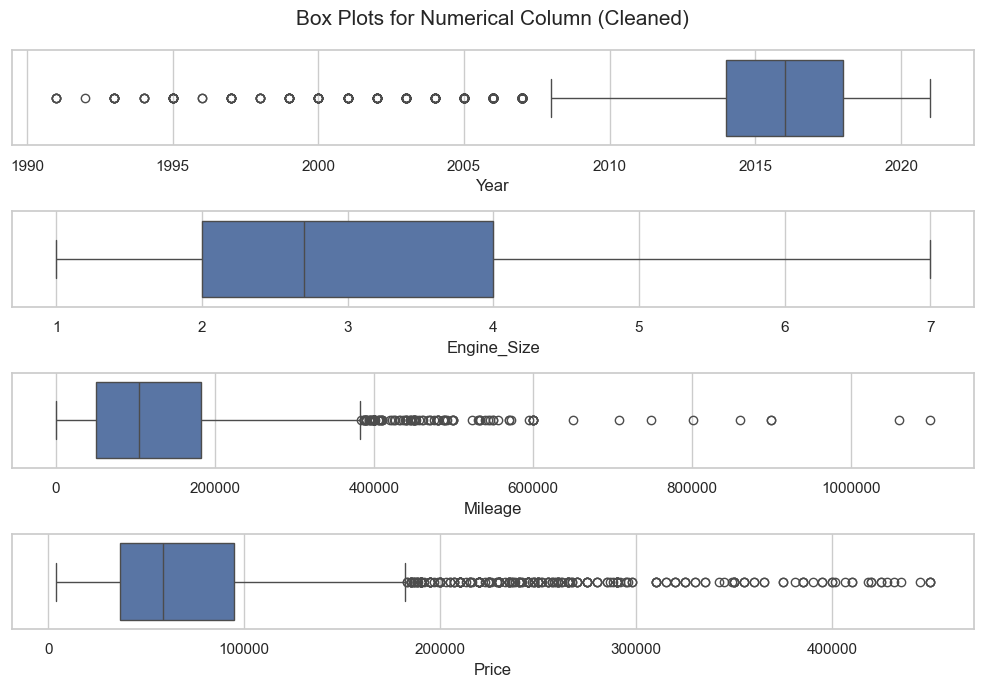

In [66]:
# Checking value range with box plot
numerical_feature = df_model.describe().columns

plt.figure(figsize= (10,7), facecolor= 'white')
sns.set(style= 'whitegrid')
plt.suptitle('Box Plots for Numerical Column (Cleaned)',fontsize= 15)
plotnumber = 1

for feature in numerical_feature:
    ax = plt.subplot(4,1,plotnumber)
    sns.boxplot(data=df_model, x=feature);

    plt.tight_layout()
    plt.ticklabel_format(axis= 'x', style= 'plain')
    plotnumber += 1

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

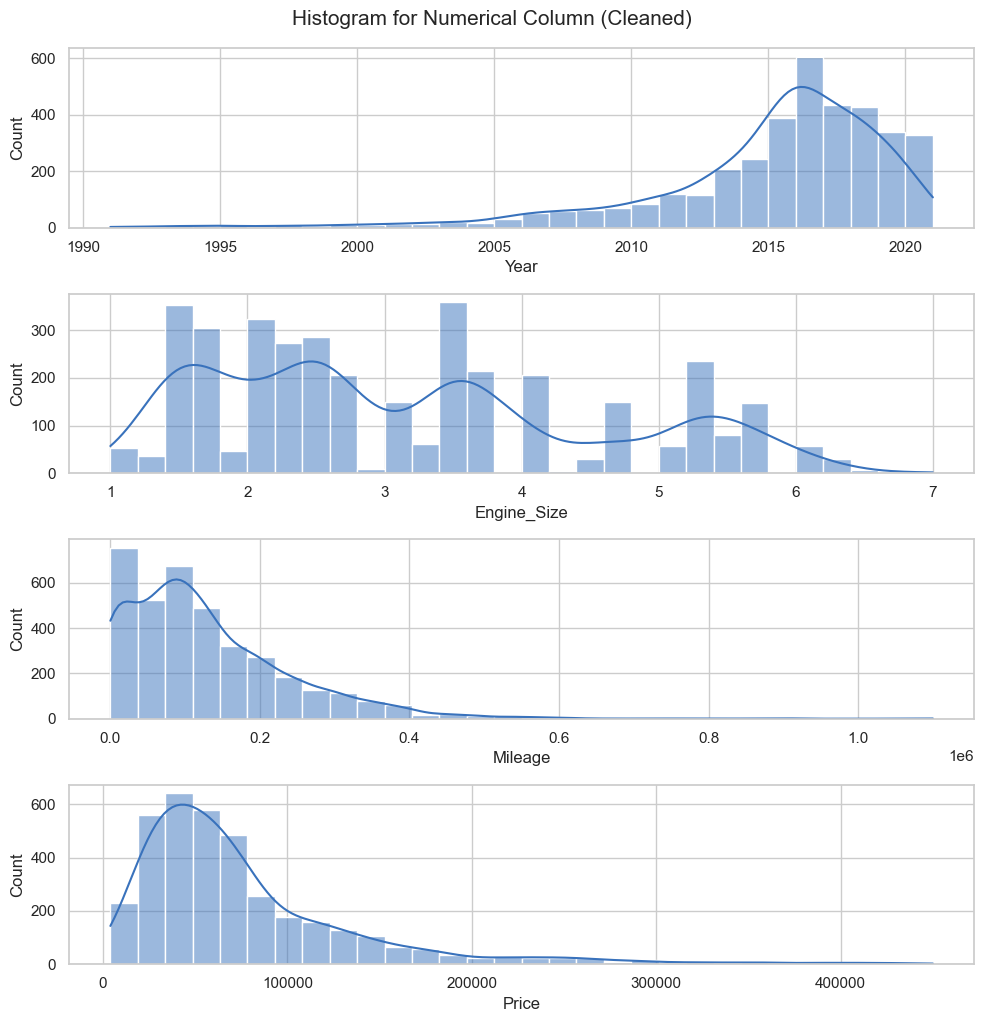

In [69]:
#Univariate Analysis with Histogram
plt.figure(figsize=(10, 10))
n = 4
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.histplot(df_model[numerical_columns[i]], color='#3972bc', bins=30,kde=True)
    plt.tight_layout()

plt.suptitle('Histogram for Numerical Column (Cleaned)', fontsize=15, y=1.02)
plt.show

#### Observation

- Most of the graph trend stays the same
- The mileage limit is now around 1,500,000 miles, rather than 20.000.000 miles.
- The price limit is now around 450,000 Riyal.
- The Engine_Size limit is now around 7,000 CC.
- The Oldest car is now 1990

### **Visualized Correlation**

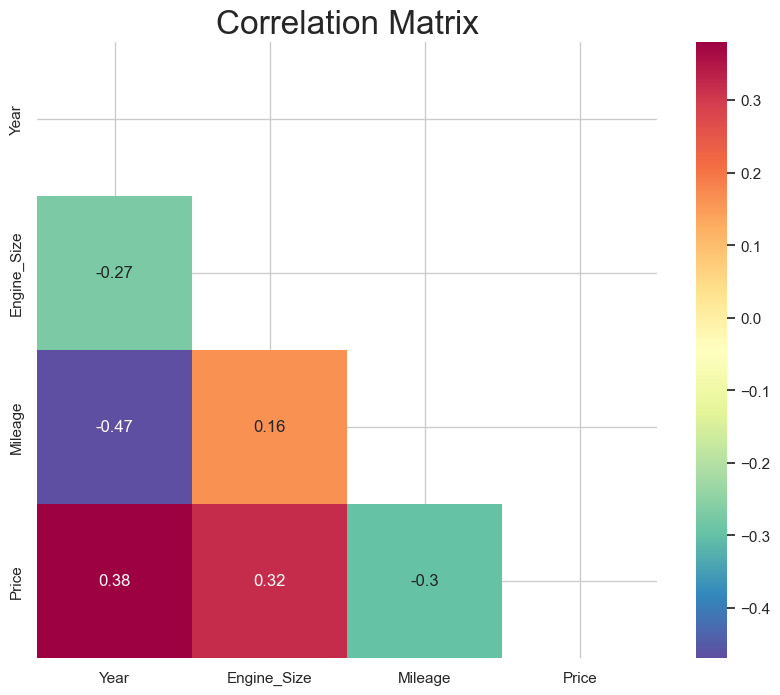

In [30]:
plt.figure(figsize= (10,8))
sns.heatmap(df_model.drop(columns= ['Negotiable']).corr(numeric_only= True), mask = np.triu(np.ones_like(df_model.drop(columns= ['Negotiable']).corr(numeric_only= True))),cmap='Spectral_r', annot= True)
plt.title('Correlation Matrix',
          fontsize= 24)
plt.show()

### Observation

- Compared to the previous heatmap, the correlation between the features and the target increased, but not by significant amount.

## **Modeling**

### _**Defining X & y**_

In [32]:
#feature
X=df_model[['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year','Engine_Size', 'Mileage']]

#Target
y=df_model['Price']

### Splitting & Importing Library

In [34]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state= 3)

X_train: (2578, 9)
y_train: (2578,)
X_test: (1106, 9)
y_test: (1106,)


### Reasoning

- The data is split into training and test datasets with a ratio of 70:30. This ensures that the model has sufficient training data while also retaining a reasonable amount for testing and comparison of results. The subsequent steps involve scaling and encoding the data.


## **Scaling & Encoding**

### _**Transformer & Encoding**_

- Gear_Type and Origin are encoded using OneHotEncoder because they have fewer than 5 unique values.
- Type, Make, and Region are encoded using BinaryEncoder since they have more than 5 unique values.
- OrdinalEncoder is used for the Options feature, as 'Full' is considered more valuable than 'Semi-Full' or 'Standard'.
- For the numerical variables in the Year, Engine_Size, and Mileage columns, RobustScaler is applied due to their skewed distributions.

In [35]:
# Mapping for ordinal encoders
ordinal_map = [{'col':'Options',
                'mapping':{'Standard'   : 1, 
                           'Semi-Full'  : 2, 
                           'Full'       : 3
                           }}]

# Create ordinal pipeline
ordinal_pipeline = Pipeline([
    ('Ordinal', ce_OrdinalEncoder(mapping=ordinal_map, cols=['Options'])),
    ('Scale', RobustScaler())
])

# Create ColumnTransformer
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['Gear_Type', 'Origin']),
    ('Binary', BinaryEncoder(), ['Type', 'Make', 'Region']),
    ('Ordinal', ordinal_pipeline, ['Options']),
    ('Scale', RobustScaler(), ['Year', 'Engine_Size', 'Mileage'])
], remainder='passthrough')

# Display the transformer
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(),
                                 ['Gear_Type', 'Origin']),
                                ('Binary', BinaryEncoder(),
                                 ['Type', 'Make', 'Region']),
                                ('Ordinal',
                                 Pipeline(steps=[('Ordinal',
                                                  OrdinalEncoder(cols=['Options'],
                                                                 mapping=[{'col': 'Options',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Standard     1
Semi-Full    2
Full         3
dtype: int64}])),
                                                 ('Scale', RobustScaler())]),
                                 ['Options']),
                                ('Scale', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

### _**Fitting**_

In [36]:
# Fitting
transformer.fit(X_train)

# Transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

### _**Benchmarking**_

- It is important to use various types of regression models, such as Linear Regression, KNN, DecisionTree, RandomForest, and XGBoost, to determine which model achieves the lowest RMSE, MAE, and MAPE scores. To accomplish this, a loop is implemented to iterate through the models, and the results are stored in lists for comparison.

In [37]:
# Defining algorithm
lr  = LinearRegression()
knn = KNeighborsRegressor()
dt  = DecisionTreeRegressor(random_state= 3)
rf  = RandomForestRegressor(random_state= 3)
xgb = XGBRegressor(random_state= 3)

# Algorithm list
models = [lr, knn, dt, rf, xgb]

# List results
score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

# Looping for each cross value
for i in models:
    
    crossval = KFold(n_splits= 5, shuffle= True, random_state= 3)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv= crossval, 
        scoring= 'neg_root_mean_squared_error'
        )

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv= crossval, 
        scoring= 'neg_mean_absolute_error'
        )

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv= crossval, 
        scoring= 'neg_mean_absolute_percentage_error'
        )
    
    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

### Results

In [38]:
# Model results
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'DecisionTree', 'RandomForest', 'XGBoost'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-46084.841277,2943.396395,-30677.158984,520.369683,-0.621123,0.020468
1,KNN,-34127.035184,1810.336712,-19100.269712,467.052716,-0.322400,0.014358
2,DecisionTree,-46022.337399,2611.031107,-24184.289504,1606.812409,-0.370452,0.037595
3,RandomForest,-30712.467666,2188.300741,-17506.285924,457.214526,-0.291662,0.019482
4,XGBoost,-30566.543351,3071.931052,-17527.698971,614.136170,-0.285513,0.011871


### Observation

- The XGBoost Regressor model has the lowest mean Root Mean Square Error, indicating the smallest error range for the recommendations. This model also has the lowest mean Mean Absolute Error and mean Mean Percentage Error.

- Since the difference between the lowest model and the second lowest model is not significant (approximately 10%), it is advisable to test both models to compare their performance on the test data.

### _**Fitting the test set**_

In [39]:
# Model
models = {'RandomForest': RandomForestRegressor(random_state= 3),
          'XGBoost': XGBRegressor(random_state= 3)
}

# List result
score_rmse = []
score_mae = []
score_mape = []

# Fitting
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Display results
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,28216.513709,15530.220298,0.283267
XGBoost,27879.931592,15185.287199,0.257457


### Observation

- After fitting and testing the models to obtain the RMSE, MAE, and MAPE scores, the XGBoost Regressor exhibits the lowest RMSE, MAE, and MAPE values.
- The chosen model is XGBoost, as it has the overall lowest error scores. This model will serve as the benchmark for subsequent tests, enabling parameter tuning to achieve even lower error values.


## **Hyperparameter Tuning**

### _**XGBoost Regressor**_

#### Parameters

In [40]:
# Depth of XGBRegressor
max_depth = list(np.arange(1, 16))

# Learning rate
learning_rate = list(np.arange(1, 90)/100)

# Estimator Value
n_estimators = list(np.arange(50, 201))

# Hyperparam XGboost
hyperparameter_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
}

### Benchmarking

In [41]:
# Benchmark with hyperparameter
xgb = XGBRegressor(random_state= 3, verbosity= 1)

# Pipeline
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits= 5, shuffle= True, random_state= 3)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparameter_xgb,
    n_iter = 200,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 3
)

In [42]:
# Fitting
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Gear_Type',
                                                                                'Origin']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Make',
                                                                                'Region']),
                                                                              ('Ordinal',
                                                                               Pipeline(steps=[('Ordinal',
                                                                                                OrdinalEncoder(cols=['Options'],
                                                                                                               mapping=[...
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...]},
                   random_state=3, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

### RMSE, MAE and MAPE results

In [43]:
# Results sorted by RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error',
                                                     'rank_test_neg_mean_absolute_error',
                                                     'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
181,0.475135,0.057970,0.059907,0.010968,193,5,0.12,"{'model__n_estimators': 193, 'model__max_depth': 5, 'model__learning_rate': 0.12}",-29347.436752,-29309.092558,-32479.604015,-24774.264786,-31522.312341,-29486.542090,2659.292245,1,-16919.455022,-17469.168625,-16500.107506,-16174.098770,-17057.488126,-16824.063610,448.809282,5,-0.293963,-0.277877,-0.256365,-0.265424,-0.263775,-0.271481,0.013198,5
160,0.352271,0.016606,0.057618,0.010147,106,5,0.24,"{'model__n_estimators': 106, 'model__max_depth': 5, 'model__learning_rate': 0.24}",-29624.127044,-31224.970631,-31654.228286,-25547.041214,-29536.374358,-29517.348307,2156.725859,2,-17254.220005,-17994.979441,-16353.151498,-16333.443580,-16695.010326,-16926.160970,629.774568,9,-0.296375,-0.281863,-0.249864,-0.272300,-0.268617,-0.273804,0.015341,11
106,0.467909,0.032680,0.050406,0.008548,166,5,0.10,"{'model__n_estimators': 166, 'model__max_depth': 5, 'model__learning_rate': 0.1}",-29085.346880,-29359.595600,-32542.336429,-25726.895976,-31037.768549,-29550.388687,2281.920793,3,-16673.761378,-17406.135826,-16579.796608,-16669.062890,-17162.538618,-16898.259064,326.230263,6,-0.286829,-0.267693,-0.258221,-0.274413,-0.264817,-0.270395,0.009724,4
127,0.238885,0.016193,0.043717,0.002322,68,5,0.27,"{'model__n_estimators': 68, 'model__max_depth': 5, 'model__learning_rate': 0.27}",-29329.679669,-29177.010414,-32807.683043,-25793.119731,-30662.841655,-29554.066903,2287.034949,4,-16676.636156,-17460.899307,-16848.065829,-16664.575212,-16989.919214,-16928.019144,292.158016,11,-0.291488,-0.297490,-0.263439,-0.290520,-0.269359,-0.282459,0.013460,21
139,0.296074,0.013977,0.050679,0.012063,119,5,0.19,"{'model__n_estimators': 119, 'model__max_depth': 5, 'model__learning_rate': 0.19}",-29477.142729,-29891.994288,-32512.675152,-25329.664815,-30576.671494,-29557.629696,2356.467895,5,-16995.648863,-17498.857278,-17003.255146,-16377.022424,-16951.151728,-16965.187088,355.897635,13,-0.294770,-0.270741,-0.261786,-0.279588,-0.257983,-0.272974,0.013219,8


In [80]:
# Check the best parameter
print('Best_score:', random_xgb.best_score_)
print('Best_parameters:', random_xgb.best_params_)

Best_score: -29486.542090495535
Best_parameters: {'model__n_estimators': 193, 'model__max_depth': 5, 'model__learning_rate': 0.12}


### Observation

The optimal parameters can now be applied to the benchmark model to determine if there is a difference in the error values:
- n_estimators: 193
- max_depth: 5
- learning_rate: 0.12
    


## **Best Model**

In [77]:
# Model XGBoost
model = {'XGBoost': XGBRegressor(random_state= 3, verbosity= 0)}

# Define
xgb_tuning = random_xgb.best_estimator_

# Fitting
xgb_tuning.fit(X_train, y_train)

# Predict test
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Append results to list
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Display results
score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index= model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,27194.482012,15079.358256,0.261151


### _**Result Comparison**_

In [78]:
# Score before tuning
pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,RMSE,MAE,MAPE
XGBoost,27879.931592,15185.287199,0.257457


In [79]:
# Score after tuning
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,27194.482012,15079.358256,0.261151


### Observation

- The final test results show an RMSE of 27.879, an MAE of 15.185, and a MAPE of 25.74%. This indicates that the model has a mean absolute error of 15.694 Riyal when compared to the test data.

- While the RMSE value will always be greater than the MAE, it highlights that, on an individual level, the model has a high error range and could benefit from further improvement.

- After applying the best parameters, the error values decreased across the board. The new values are 27.194 for RMSE, 15.079 for MAE, and 26.11% for MAPE. This demonstrates that the model with the optimized parameters is more accurate in predicting car prices, albeit only slightly.

### _**Visualization**_

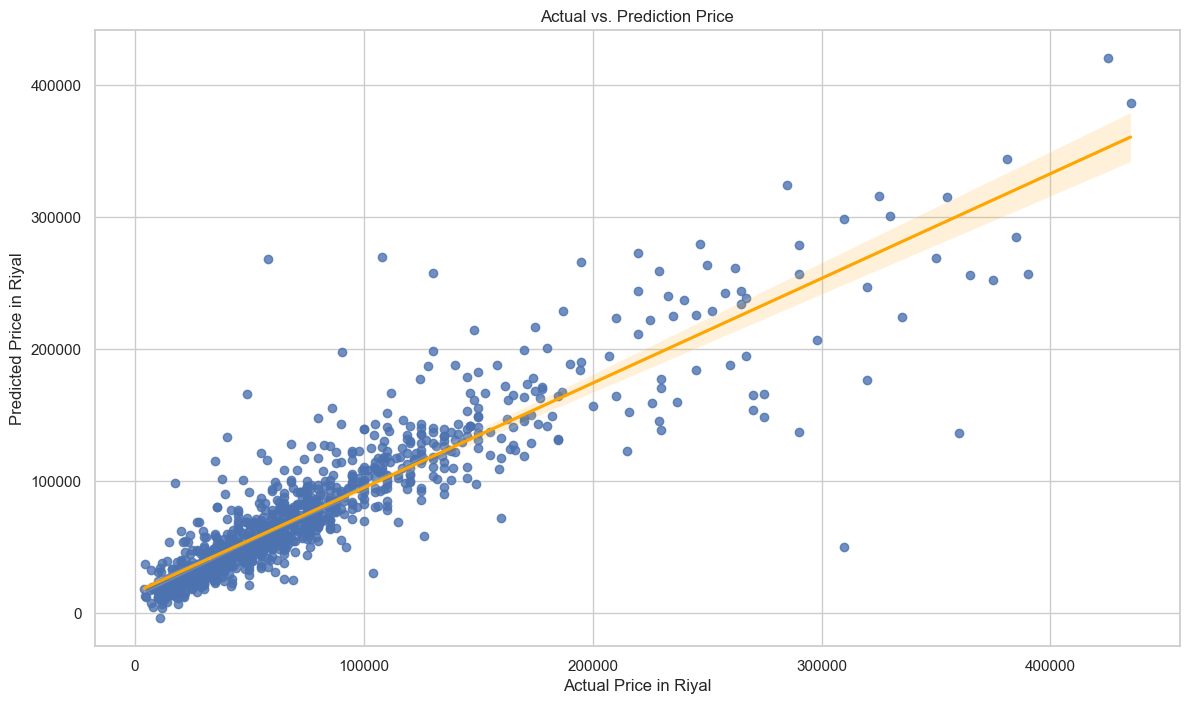

In [48]:
# Regplot of the test in relation to the prediction with XGBRegression
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning, line_kws={"color": "orange"}).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price in Riyal', 
                                               ylabel='Predicted Price in Riyal');

### Observation

- Visualizing the data clearly shows that the high RMSE, MAE, and MAPE scores are due to the wider spread in prices of expensive cars. This means the model can overestimate or underestimate prices with an error rate of 25%, which is considered an acceptable result for a prediction model.

- Car prices that are under 150.000 Riyal follows the prediction more closely than cars with prices above 150.000 Riyal, because the price fluctuates greatly for luxury cars.


## **Feature Importance**

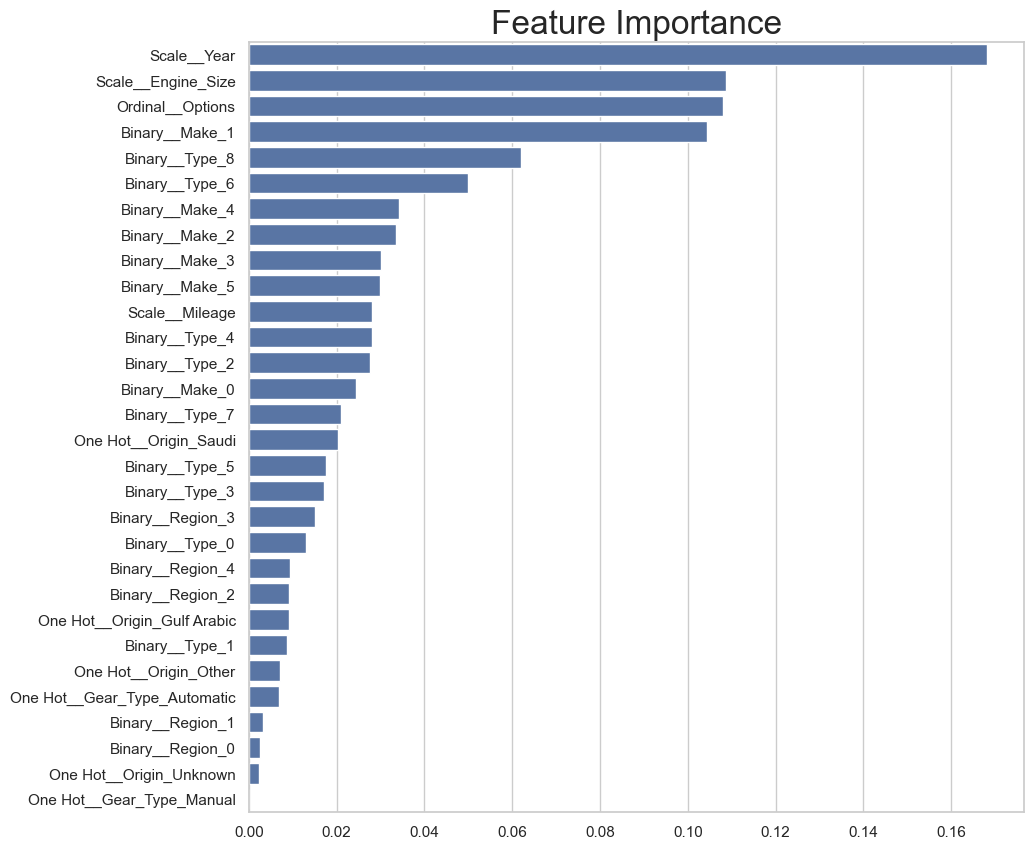

In [49]:
# Plot name of feature importance
plt.figure(figsize=(10, 10))
features = pd.Series(xgb_tuning['model'].feature_importances_,
                        transformer.get_feature_names_out()).sort_values(ascending= False)
sns.barplot(data= features,
            orient= 'h')
plt.title('Feature Importance',
          fontsize= 24)

plt.show()

### Observation

- The graph indicates that several columns have a significant impact on price when modeled: Year, Engine_Size, and Options. In contrast, the Region and Origin columns rank low in importance. Therefore, these two columns can be excluded when modeling the next dataset using the same model and parameters.


## Rule Based (Comparison)

For comparison with Machine Learning, we can also make prediction with Rule Based.

In [57]:
#Manual Binning 
df_model['bin_age']=pd.qcut(df_model['Year'],5,labels=['Very New', 'New', 'Average Age','Old',' Very Old'])
df_model['bin_mile']=pd.qcut(df_model['Mileage'],5,labels=['Very Low','Low', 'Average Mile', 'High','Very High'])
df_model['bin_engine']=pd.qcut(df_model['Engine_Size'],5,labels=['Very Small','Small', 'Average Size', 'Big','Very Big'])


In [58]:
df1=df_model.groupby(['bin_age','bin_mile','bin_engine','Options','Gear_Type'])['Price'].mean().reset_index()
df1.columns=['bin_age','bin_mile','bin_engine','Options','Gear_Type','flag_RB']
df1.head()

,bin_age,bin_mile,bin_engine,Options,Gear_Type,flag_RB
0,Very New,Very Low,Very Small,Full,Automatic,46600.000000
1,Very New,Very Low,Very Small,Full,Manual,7000.000000
2,Very New,Very Low,Very Small,Semi Full,Automatic,20000.000000
3,Very New,Very Low,Very Small,Semi Full,Manual,25375.000000
4,Very New,Very Low,Very Small,Standard,Automatic,23083.333333


In [59]:
df2=pd.merge(df_model,df1, how='left',on=['bin_age','bin_mile','bin_engine','Options','Gear_Type'])
df2.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,bin_age,bin_mile,bin_engine,flag_RB
0,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,New,High,Very Big,135904.761905
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,New,Very High,Small,39150.000000
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,Very Old,Very Low,Small,103678.571429
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,Very New,High,Very Big,69500.000000
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000,Average Age,Very Low,Small,81090.909091


In [60]:
#feature
X=df2[['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year','Engine_Size', 'Mileage','flag_RB']]

y=df2['Price']
X_train2, X_test2, y_train2, y_test2=train_test_split(X,y,test_size=0.3,random_state=3)


In [61]:
y_pred=X_test2['flag_RB']

In [62]:
print('MSE',mean_squared_error(y_test2, y_pred))
print('MAE',mean_absolute_error(y_test2, y_pred))
print('RMSE',mean_squared_error(y_test2, y_pred)**(0.5))

MSE 1389032665.9737499
MAE 22169.45224032392
RMSE 37269.72854708966


### Observation
**`Rule Based`** :
When using rule based, the model produces an MAE of `22,169` Riyals, meaning that every prediction made by the model, has a tendency to miss `22,169` Riyals.
Assuming there are 100 cars that have been sold, this means that the resulting loss if using rulebased is `100 x 22,991 = 2,216,900` Riyals.


**`Machine Learning`** :
Meanwhile, if you use Machine Learning, the XGB Regressor Model produces an MAE of `15,079` Riyals, meaning that every prediction made by the model has a tendency to miss by `15,079` Riyals. If it is assumed that 100 cars have been sold, this means that the resulting loss if using machine learning is `100 x 15,079 = 1,507,900` Riyals.

In other words, Machine Learning can save a loss of `709,000` Riyals per 100 cars are sold.



## **Conclusion**

- After selecting the XGBoost Regression model and its optimal parameters, it was found that the model has a reasonable error margin of around 25%, given the price range of the cars. This means that when a car is listed on the website, the model's recommendation will correctly approximate the price 75% of the time.

- To better streamline the model and still give a reasonably accurate recommendation, the feature selection graph could be taken into consideration. Where it can be said that Options, Year and Engine_Size, has the strongest impact on price and other columns could be disregarded.

- In a sense, older cars will have lower prices, except in certain scenario (like luxury cars). While bigger engine size is more frequent in more expensive cars, where mass produced car will have smaller engine to be more efficient. As for the make of the car, it will certainly impact price as some car makers are more prefered than others.

- This model will certainly help the seller, even considering the range of error, to give an approximation of the price that the car should be sold at. In relation to that, if the seller is able to list the car without under- or overselling it, the prices will have a more uniform distribution and could produce a better model. 

- In the end the model is only as accurate as the data it was given, so to improve the recommendation more data could be inserted to the model. For example, even though the price is negotiable, it should still be given the price that the seller will accept. By gaining more data in this dataset, the model could predict more accurately.



## **Recommendation**

The sales performance of Syarah can be compared to the actual prices set by the sellers themselves through A/B testing. This method can improve the model by introducing new data that impacts pricing.

Other ways to enhance the model include:

1. **Classifying Cars:** Generally, cars can be divided into two categories: luxury and normal. If the data is separated into these categories, where normal cars have more uniform prices and luxury car prices are less influenced by year or mileage, the model could provide more accurate recommendations for normal cars. More tuning and additional features may be needed to improve the model for luxury cars.

1. **Adding More Data:** Expanding the dataset with more values and relevant features can improve the model's accuracy in predicting car prices.

1. **Using GridSearch:** This can optimize the model's predictions, though it requires more resources and may be costlier in the long run.



Where on the business side:

1. **Tracking Price Fluctuations:** By noting the price changes after a car is listed, a detailed record of price variations over time can be maintained. This data can indicate whether a car is easy or difficult to sell. The model can then adjust its recommendations based on median prices, improving accuracy.

1. **Determining Car Popularity:** Tracking price changes can also reveal the popularity of certain cars, as some brands are more preferred by buyers. This information can help businesses promote more popular cars on the front page, increasing the success rate of sales.

1. **Attracting Users:** Accurate price recommendations will attract more users to the website, both sellers looking to list their cars and buyers seeking price ranges for potential purchases. With more sellers, there is a higher likelihood that they will use advertisements to boost their sales, benefiting the company in the long run by enhancing the recommendation system.

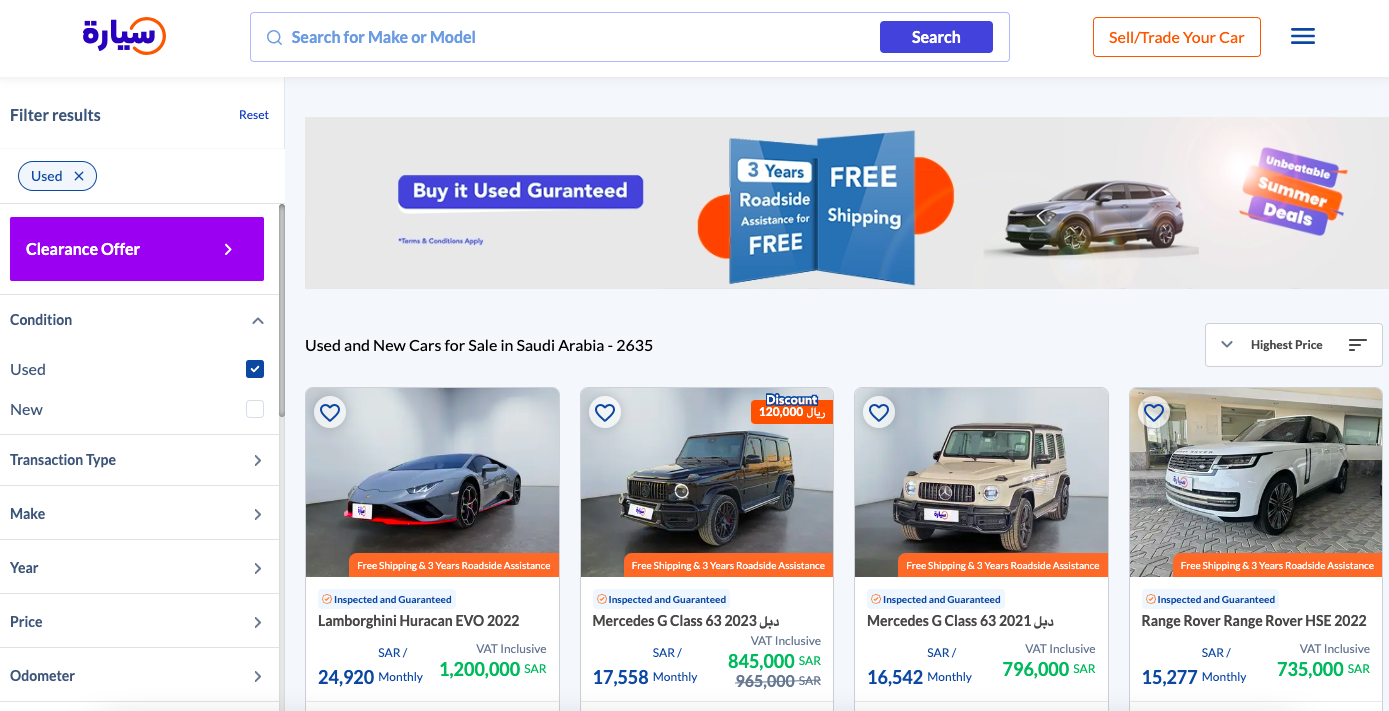

---

## **Save Model**

In [82]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_XGB.sav', 'wb'))

In [83]:
# Load model
filename = 'Model_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [84]:
# save to csv format
df_model.to_csv('data_saudi_used_cars_cleaned.csv')